In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
import re
import preprocessor as p#forming a separate feature for cleaned tweets
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexkroeker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = []
for file in range(14):
    data.append(open('Tweet-Data/Digital_Master_tweets-'+str(2007+file)+'.jl'))

In [4]:
doc = []
for file in data:
    for line in file:
        doc.append(json.loads(line))

In [5]:
len(doc)

116

In [6]:
emptyList = []
for dict in doc:
    emptyList.append(dict['response'])
    

In [7]:
len(emptyList)

116

In [8]:
def check(dictionary):
    if dictionary['result_count'] == 0: return False
    else: return True

In [9]:
emptyData = []
for dict in emptyList:
    if check(dict['meta']): emptyData.append(dict['data'])

In [10]:
len(emptyData)


116

In [11]:
pd.DataFrame(emptyData[2])

conversation_id                                               text lang  \
0        7160035672  ♪あう♪とぉぉ♪う゛ぁぁぁぁぁん・・・♪ RT @graphicas: ♪Autobahn ...   ja   
1        7134857447  @RonASpaulding well, I'm an artist, worked wit...   en   
2        7100800305  @snowsera @SViscous  was wondering if her Vamp...   en   
3        7100800305  @snowsera Well, we were debating about new vin...   en   
4        7083487429  Digital Resale Rights Store - Quality Digital ...   en   
..              ...                                                ...  ...   
324      1129386361  Bow down before your new digital masters at La...   en   
325      1099641696  Photo News: TWIPPHOTO.COM Photo Book Reviews #...   en   
326      1095784673  TWIPPHOTO.COM Photo Book Reviews #37 - Digital...   en   
327      1095178058  TWIPPHOTO.COM Photo Book Reviews #37 - Digital...   en   
328      1094610580  I'm starting to think maybe Digital Masters ha...   en   

             id              source author_id  \
0    7160035672  Twitter Web Client  55464572   
1    7134988143  Twitter Web Client  25338242   
2    7101545011  Twitter Web Client  16609006   
3    7101519244  Twitter Web Client  16609006   
4    7083487429  Twitter Web Client  66882983   
..          ...                 ...       ...   
324  1129386361  Twitter Web Client  14793394   
325  1099641696  Twitter Web Client   4550361   
326  1095784673  Twitter Web Client  13212162   
327  1095178058  Twitter Web Client  16196479   
328  1094610580  Twitter Web Client  14636607   

                                              entities  possibly_sensitive  \
0    {'mentions': [{'start': 24, 'end': 34, 'userna...               False   
1    {'mentions': [{'start': 0, 'end': 14, 'usernam...               False   
2    {'annotations': [{'start': 42, 'end': 62, 'pro...               False   
3    {'mentions': [{'start': 0, 'end': 9, 'username...               False   
4                                                  NaN               False   
..                                                 ...                 ...   
324  {'annotations': [{'start': 44, 'end': 50, 'pro...               False   
325  {'annotations': [{'start': 90, 'end': 106, 'pr...               False   
326                                                NaN               False   
327                                                NaN               False   
328  {'annotations': [{'start': 28, 'end': 42, 'pro...               False   

                   created_at  \
0    2009-12-29T14:17:10.000Z   
1    2009-12-28T21:14:01.000Z   
2    2009-12-27T21:55:25.000Z   
3    2009-12-27T21:54:16.000Z   
4    2009-12-27T06:38:47.000Z   
..                        ...   
324  2009-01-19T01:36:37.000Z   
325  2009-01-06T15:31:10.000Z   
326  2009-01-04T21:30:22.000Z   
327  2009-01-04T14:20:44.000Z   
328  2009-01-04T04:12:07.000Z   

                                        public_metrics reply_settings  \
0    {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
1    {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
2    {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
3    {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
4    {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
..                                                 ...            ...   
324  {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
325  {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
326  {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
327  {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   
328  {'retweet_count': 0, 'reply_count': 0, 'like_c...       everyone   

                                referenced_tweets in_reply_to_user_id  
0                                             NaN                 NaN  
1    [{'type': 'replied_to', 'id': '7134857447'}]            24062771  
2    [{'type': 'replied_to', 'id': '710

In [12]:
df = pd.DataFrame(emptyData[0])

In [13]:
for obj in range(1,len(emptyData)):
    df = df.append(pd.DataFrame(emptyData[obj]))

In [14]:
df.shape

(50407, 16)

In [15]:
df_clean = df

In [16]:
df_clean.to_pickle("../dummy.pkl5")

In [17]:
df_clean = pd.read_pickle("../dummy.pkl5")

In [18]:
df_clean = df_clean[['lang','author_id','source','text', 'created_at']]

In [19]:
def isRT(text):
        if text.startswith("RT"): return "True"
        else: return "False"

In [20]:
df_clean['is_RT'] = df_clean['text'].map(isRT)

In [21]:
df_clean = df_clean[df_clean['is_RT']=="False"]

In [22]:
df_clean.shape

(33829, 6)

In [23]:
import seaborn as sns

/Users/alexkroeker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang', ylabel='count'>

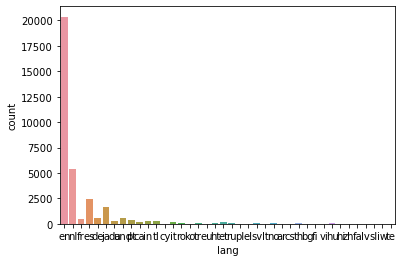

In [24]:
sns.countplot(df_clean['lang'])

In [25]:
df_lang = df_clean.copy()
df_lang = df_lang.groupby('lang').agg({'lang':'count'})
df_lang

lang
lang       
ar       25
bg        1
ca      222
cs       20
cy       14
da      250
de      542
el       12
en    20366
es     2413
et      156
eu       26
fa        2
fi       14
fr      460
hi        5
ht       41
hu       39
in      320
it      179
iw        1
ja     1658
ko       20
lt        9
lv        1
nl     5404
no       36
pl       18
pt      368
ro       73
ru       45
sl        1
sv       30
te        1
th      117
tl      321
tr       71
und     533
vi       12
zh        3

In [26]:
df_clean = df_clean[(df_clean['lang'] == "en")]

In [27]:
df_clean = df_clean.drop(['is_RT'], axis=1)

In [28]:
df_clean.nunique()

lang              1
author_id     11383
source          588
text          18545
created_at    19956
dtype: int64

In [29]:
def createdAt(date):
    return date.split('-')[:1][0]
    

In [30]:
df_clean['year'] = df_clean.created_at.map(createdAt)
df_clean.head(20)

lang author_id              source  \
0    en    779578  Twitter Web Client   
1    en    779578  Twitter Web Client   
2    en   9414182  Twitter Web Client   
3    en   9414182  Twitter Web Client   
4    en   9414182  Twitter Web Client   
0    en  17503824  Twitter Web Client   
1    en  15016032  Twitter Web Client   
2    en  15016032  Twitter Web Client   
3    en  15897285  Twitter Web Client   
4    en  15204703  Twitter Web Client   
5    en  15016032  Twitter Web Client   
6    en  15016032  Twitter Web Client   
7    en   9459232  Twitter Web Client   
8    en  14822780  Twitter Web Client   
9    en  14822780  Twitter Web Client   
10   en  15016032  Twitter Web Client   
11   en   3413451  Twitter Web Client   
15   en  14803082  Twitter Web Client   
16   en   3032551  Twitter Web Client   
17   en  14555151  Twitter Web Client   

                                                 text  \
0   $208,569\nYearly cost of saving a digital mast...   
1   $1,059 Yearly cost of saving film master\n$12,...   
2   www.newestdiscovery.com update: The Afterlife ...   
3   www.newestdiscovery.com update: The Afterlife ...   
4   www.newestdiscovery.com update: The Afterlife ...   
0   @shortyawards I nominate @underthebar for a Sh...   
1   Finally finishing up Digital Masters Survey. C...   
2   Preparing for the fifth Digital Masters interv...   
3   Found digital masters of four oral histories. ...   
4   d: Digital Masters: B&W Printing: Creating the...   
5   is amazed by the user engagement of students i...   
6   finally finished the Digital Masters montage v...   
7   France's Digital Master Plan Unveiled http://t...   
8          Digital Masters makes Belgian youth go 2.0   
9   my StarFactor up with 1% thx to Digital Master...   
10  Where are all those young geeks & nerds at? Pa...   
11  any good digital masters degrees other than th...   
15  Free digital Masters Course for working at hom...   
16  Striving to be a digital master gardener. The ...   
17  So, I just spent $160 on 10 HDV "Digital Maste...   

                  created_at  year  
0   2007-12-27T18:40:25.000Z  2007  
1   2007-12-27T18:39:37.000Z  2007  
2   2007-12-27T05:00:12.000Z  2007  
3   2007-12-27T02:30:17.000Z  2007  
4   2007-12-26T19:30:04.000Z  2007  
0   2008-12-19T22:18:15.000Z  2008  
1   2008-12-09T16:30:35.000Z  2008  
2   2008-11-28T10:59:02.000Z  2008  
3   2008-11-19T19:13:58.000Z  2008  
4   2008-11-18T03:18:56.000Z  2008  
5   2008-11-12T15:40:20.000Z  2008  
6   2008-10-29T15:59:32.000Z  2008  
7   2008-10-20T16:22:40.000Z  2008  
8   2008-10-14T07:46:45.000Z  2008  
9   2008-10-13T10:50:38.000Z  2008  
10  2008-10-08T08:05:42.000Z  2008  
11  2008-10-02T09:09:08.000Z  2008  
15  2008-09-01T21:34:19.000Z  2008  
16  2008-08-26T18:27:10.000Z  2008  
17  2008-08-20T18:47:21.000Z  2008

In [31]:
df_clean = df_clean.drop(columns=['created_at', 'lang'], axis=1)

In [32]:
df_clean['hashtag'] = df_clean['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_clean

author_id              source  \
0                 779578  Twitter Web Client   
1                 779578  Twitter Web Client   
2                9414182  Twitter Web Client   
3                9414182  Twitter Web Client   
4                9414182  Twitter Web Client   
..                   ...                 ...   
227  1133380998408884224      erased17060152   
236  1166115049678807041     Twitter Web App   
238            419951447               IFTTT   
239   778779657109995521        twittbot.net   
240             19837512     Twitter Web App   

                                                  text  year  \
0    $208,569\nYearly cost of saving a digital mast...  2007   
1    $1,059 Yearly cost of saving film master\n$12,...  2007   
2    www.newestdiscovery.com update: The Afterlife ...  2007   
3    www.newestdiscovery.com update: The Afterlife ...  2007   
4    www.newestdiscovery.com update: The Afterlife ...  2007   
..                                                 ...   ...   
227  #nowplaying on Scotty Gee Radio, hosted by @Li...  2020   
236  If you ever need something "Mastered for iTune...  2020   
238  The Best “Phenomenon” Quotes of “Digital Maste...  2020   
239  Save the World from a Digi-Disaster\nThe threa...  2020   
240  @alixnovosi just think if they keep up on the ...  2020   

                                               hashtag  
0                                                   []  
1                                                   []  
2                                                   []  
3                                                   []  
4                                                   []  
..                                                 ...  
227          [nowplaying, music, radio, radioshow, NP]  
236  [MfiT, AppleDigitalMasters, Mastering, Recording]  
238                                                 []  
239                                                 []  
240                                                 []  

[20366 rows x 5 columns]

In [33]:
df_clean.to_pickle('../data_clean_en_year5.plk') 

In [34]:
text = df_clean['text']

In [35]:
text = text.tolist()

In [36]:
for i,v in enumerate(text):
    text[i] = p.clean(v)

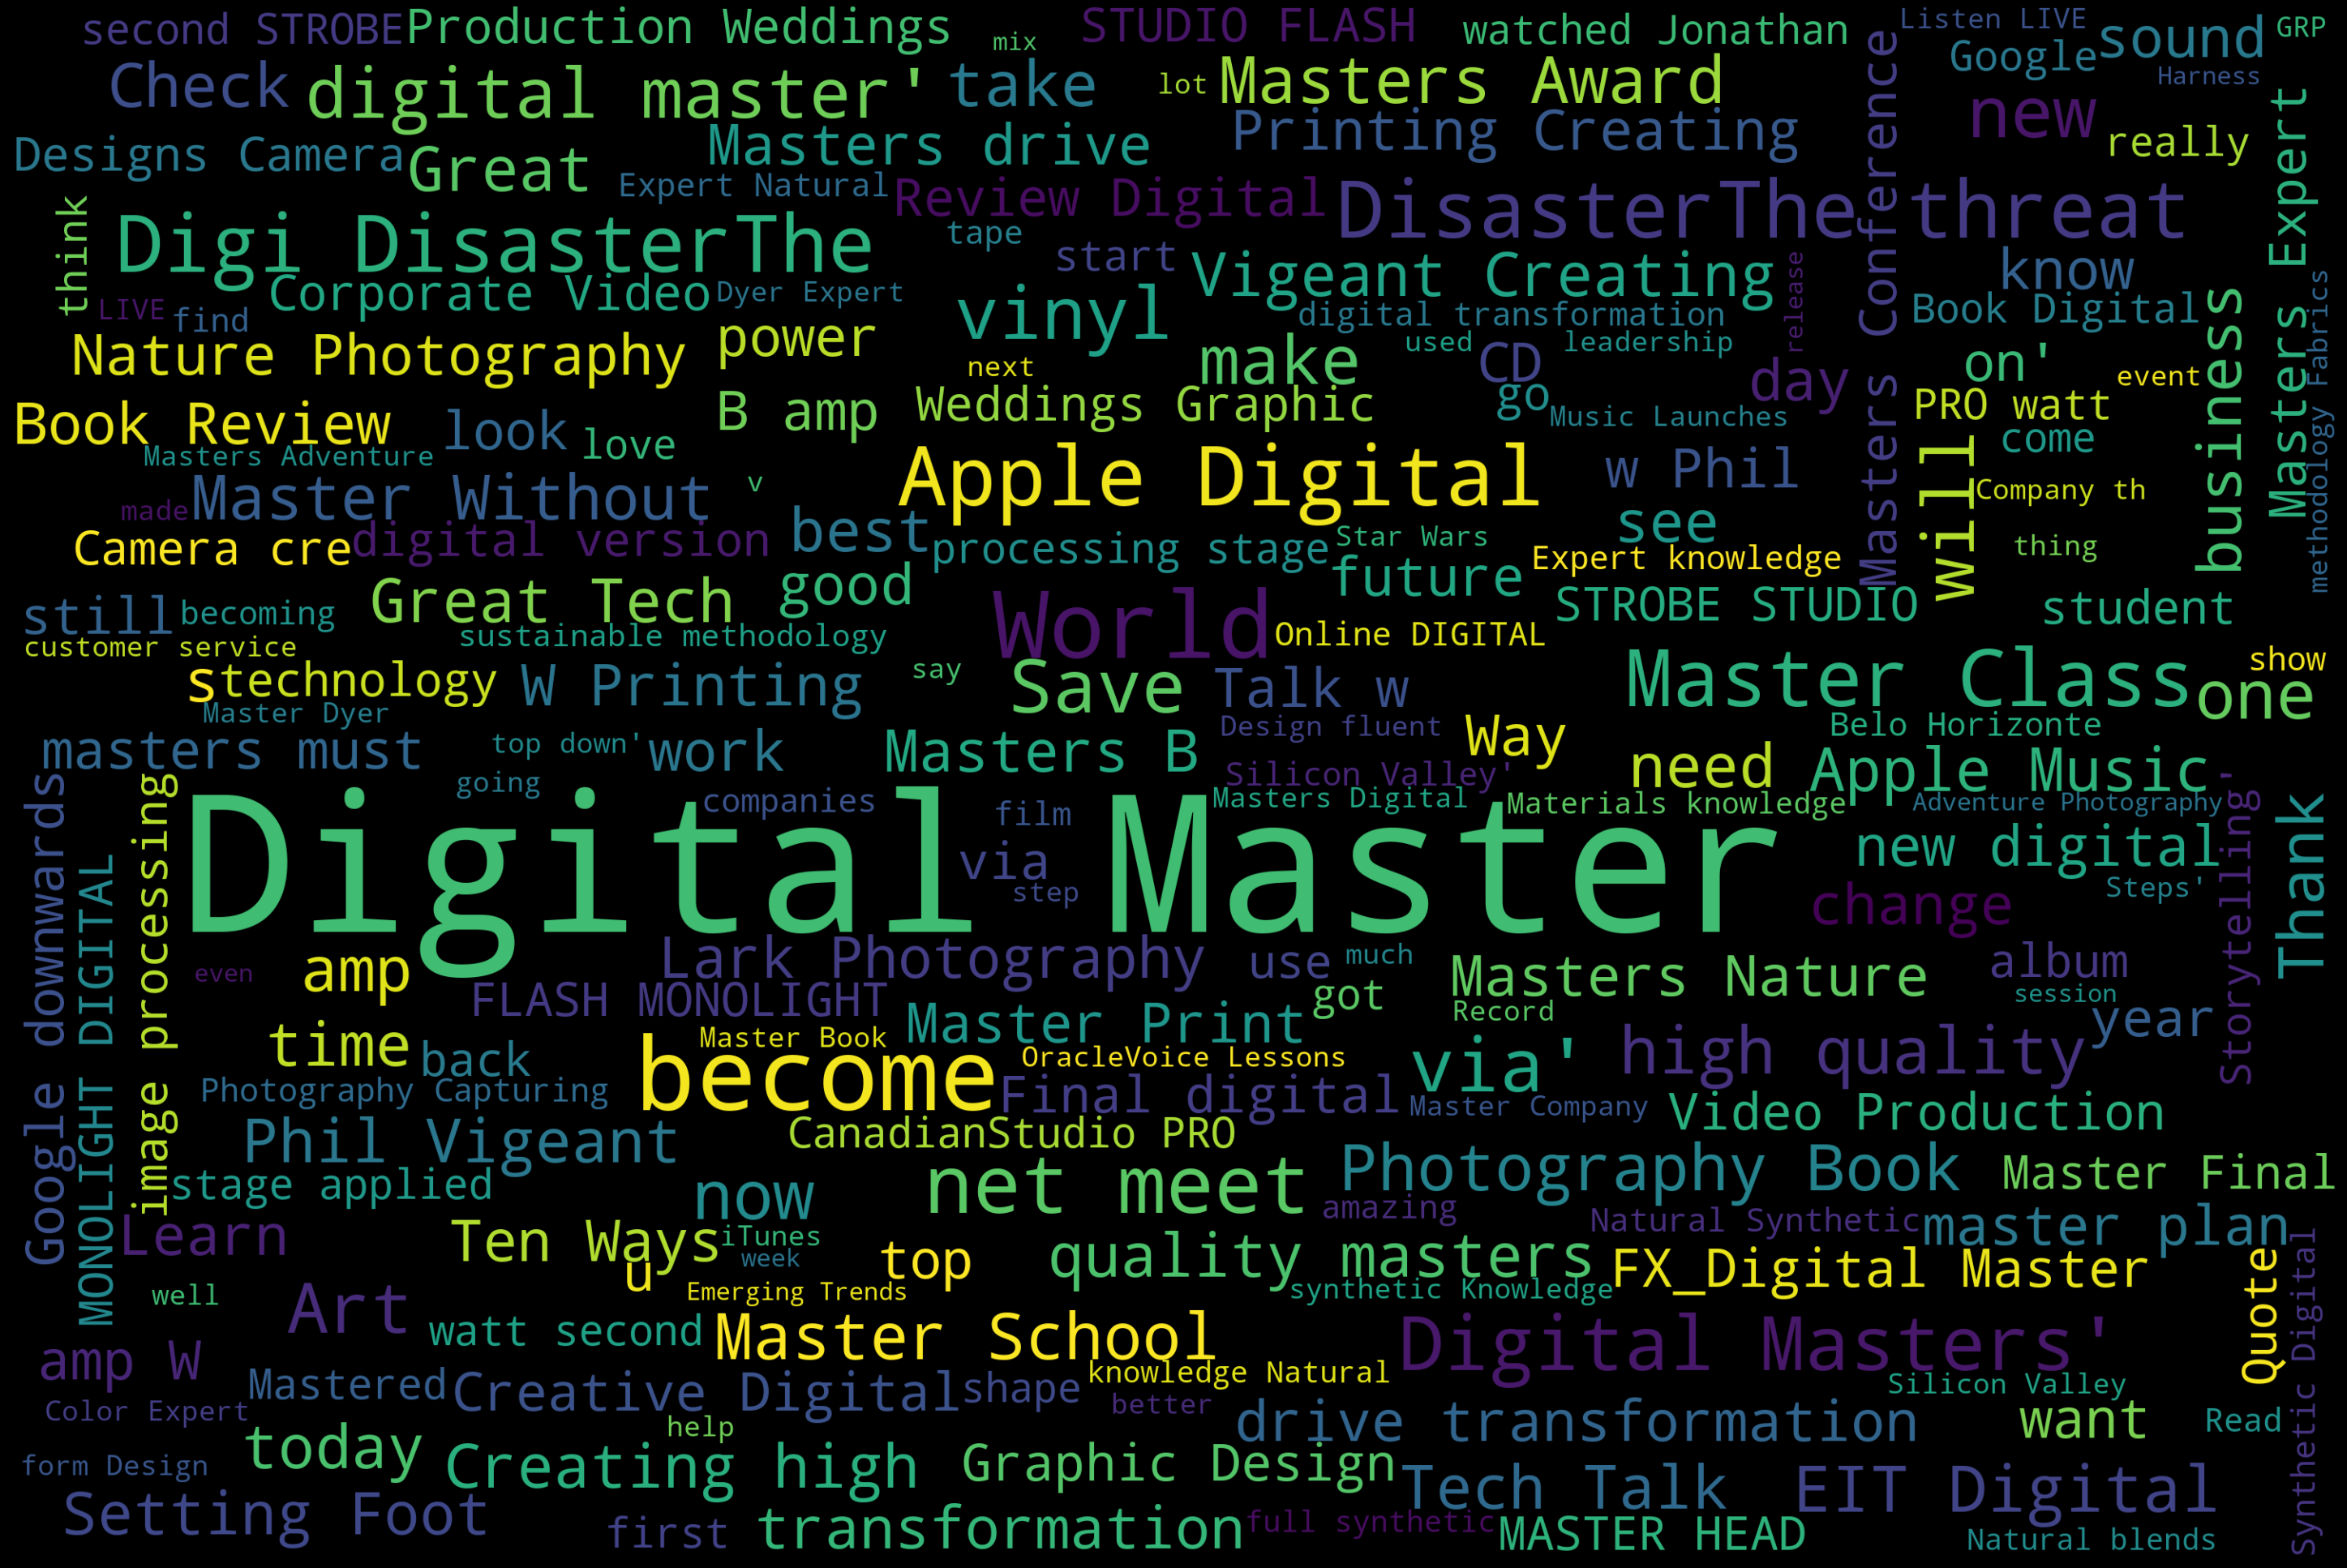

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [38]:
pd.DataFrame(text).to_pickle("../text_preprocessing5")

In [39]:
def txt_cleaner(text):
    
    text = text.encode(encoding="ascii", errors="ignore")
    text = text.decode() # removing unicode from the text 
    
    text = p.clean(text)
    
    text = text.lower() #lowering all the text
    
    punct = set(string.punctuation)
    text = "".join([ch for ch in text if ch not in punct]) #remove punctation
    
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words]) #remove stopwords
    # try out stemming and lemmatization
    return text

In [40]:
df_clean['text'] = df_clean.text.map(txt_cleaner)

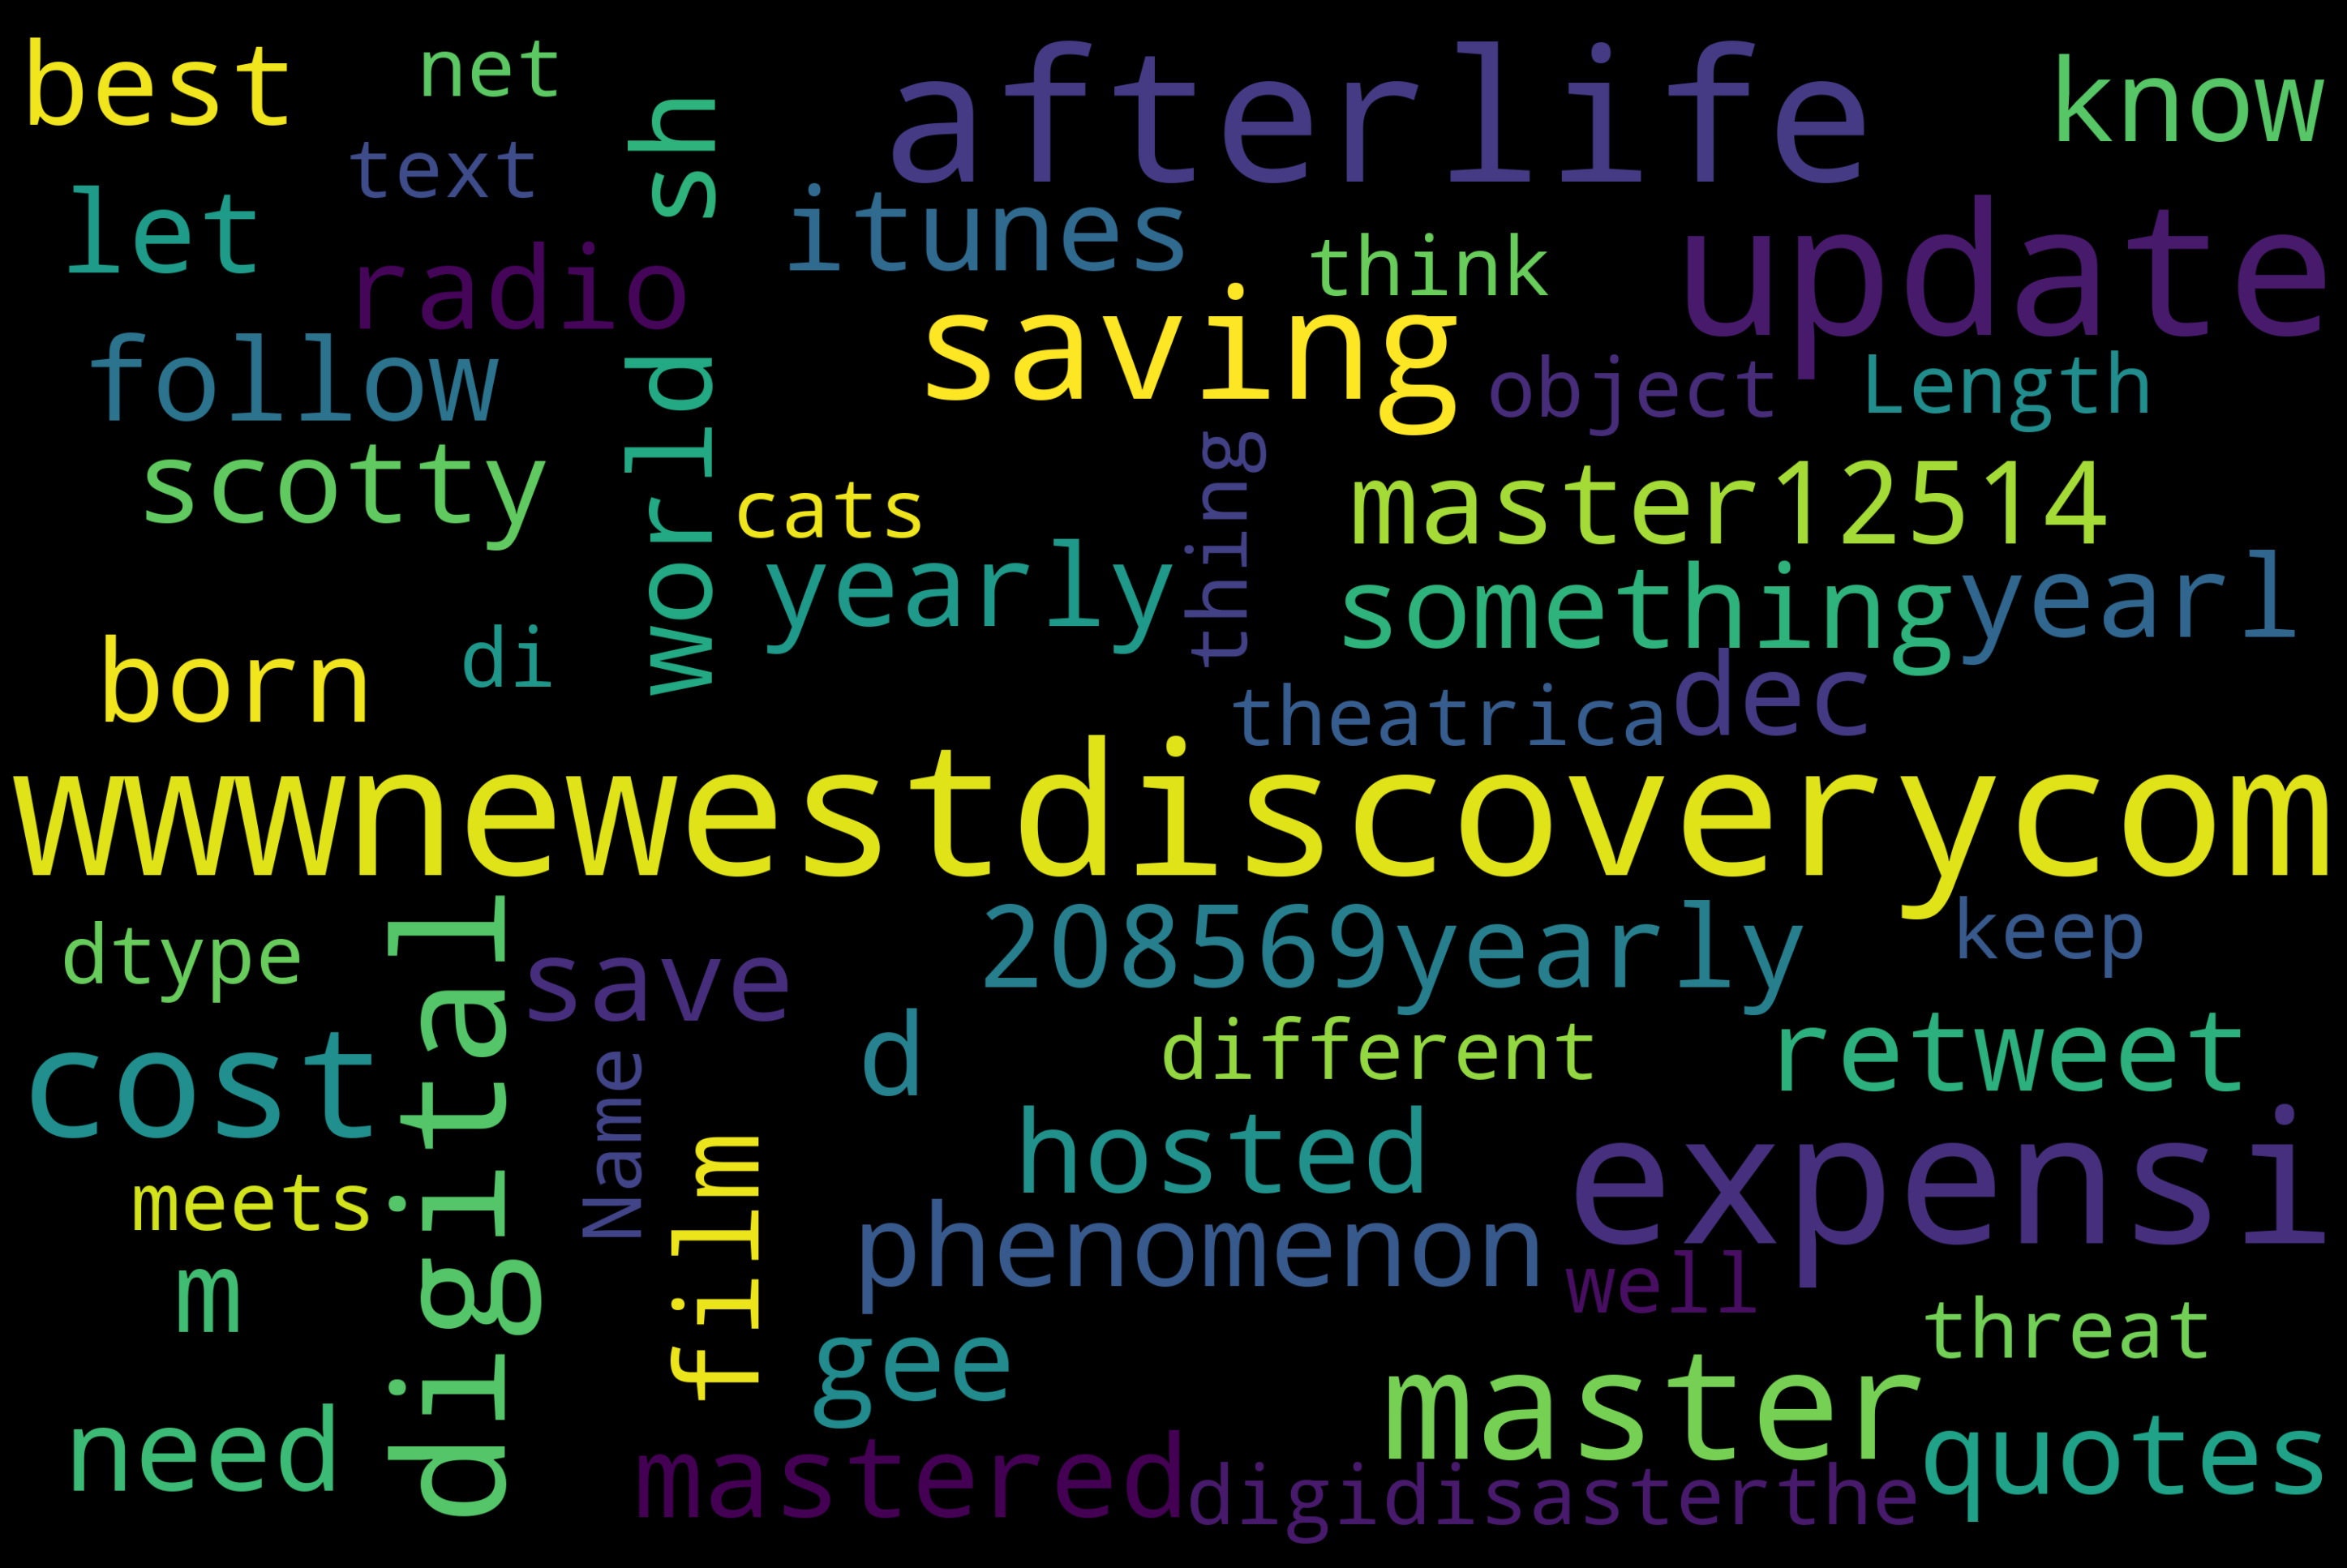

In [48]:
df_clean['text'].iloc[5]

'nominate shorty award elitefts digital master twitter youtube'

In [51]:
df_clean = df_clean.drop_duplicates(subset=['text'])

In [52]:
df_clean['text']

0      208569yearly cost saving digital master born d...
1      1059 yearly cost saving film master12514 yearl...
2      wwwnewestdiscoverycom update afterlife expensi...
0      nominate shorty award elitefts digital master ...
1      finally finishing digital masters survey curio...
                             ...                        
223    wonder cg cd releases still slow though got ri...
225    scope digital marketing nothing magical41 curr...
236    ever need something mastered itunes let know m...
238            best phenomenon quotes digital master dec
240    think keep cats thing well different theatrica...
Name: text, Length: 12688, dtype: object

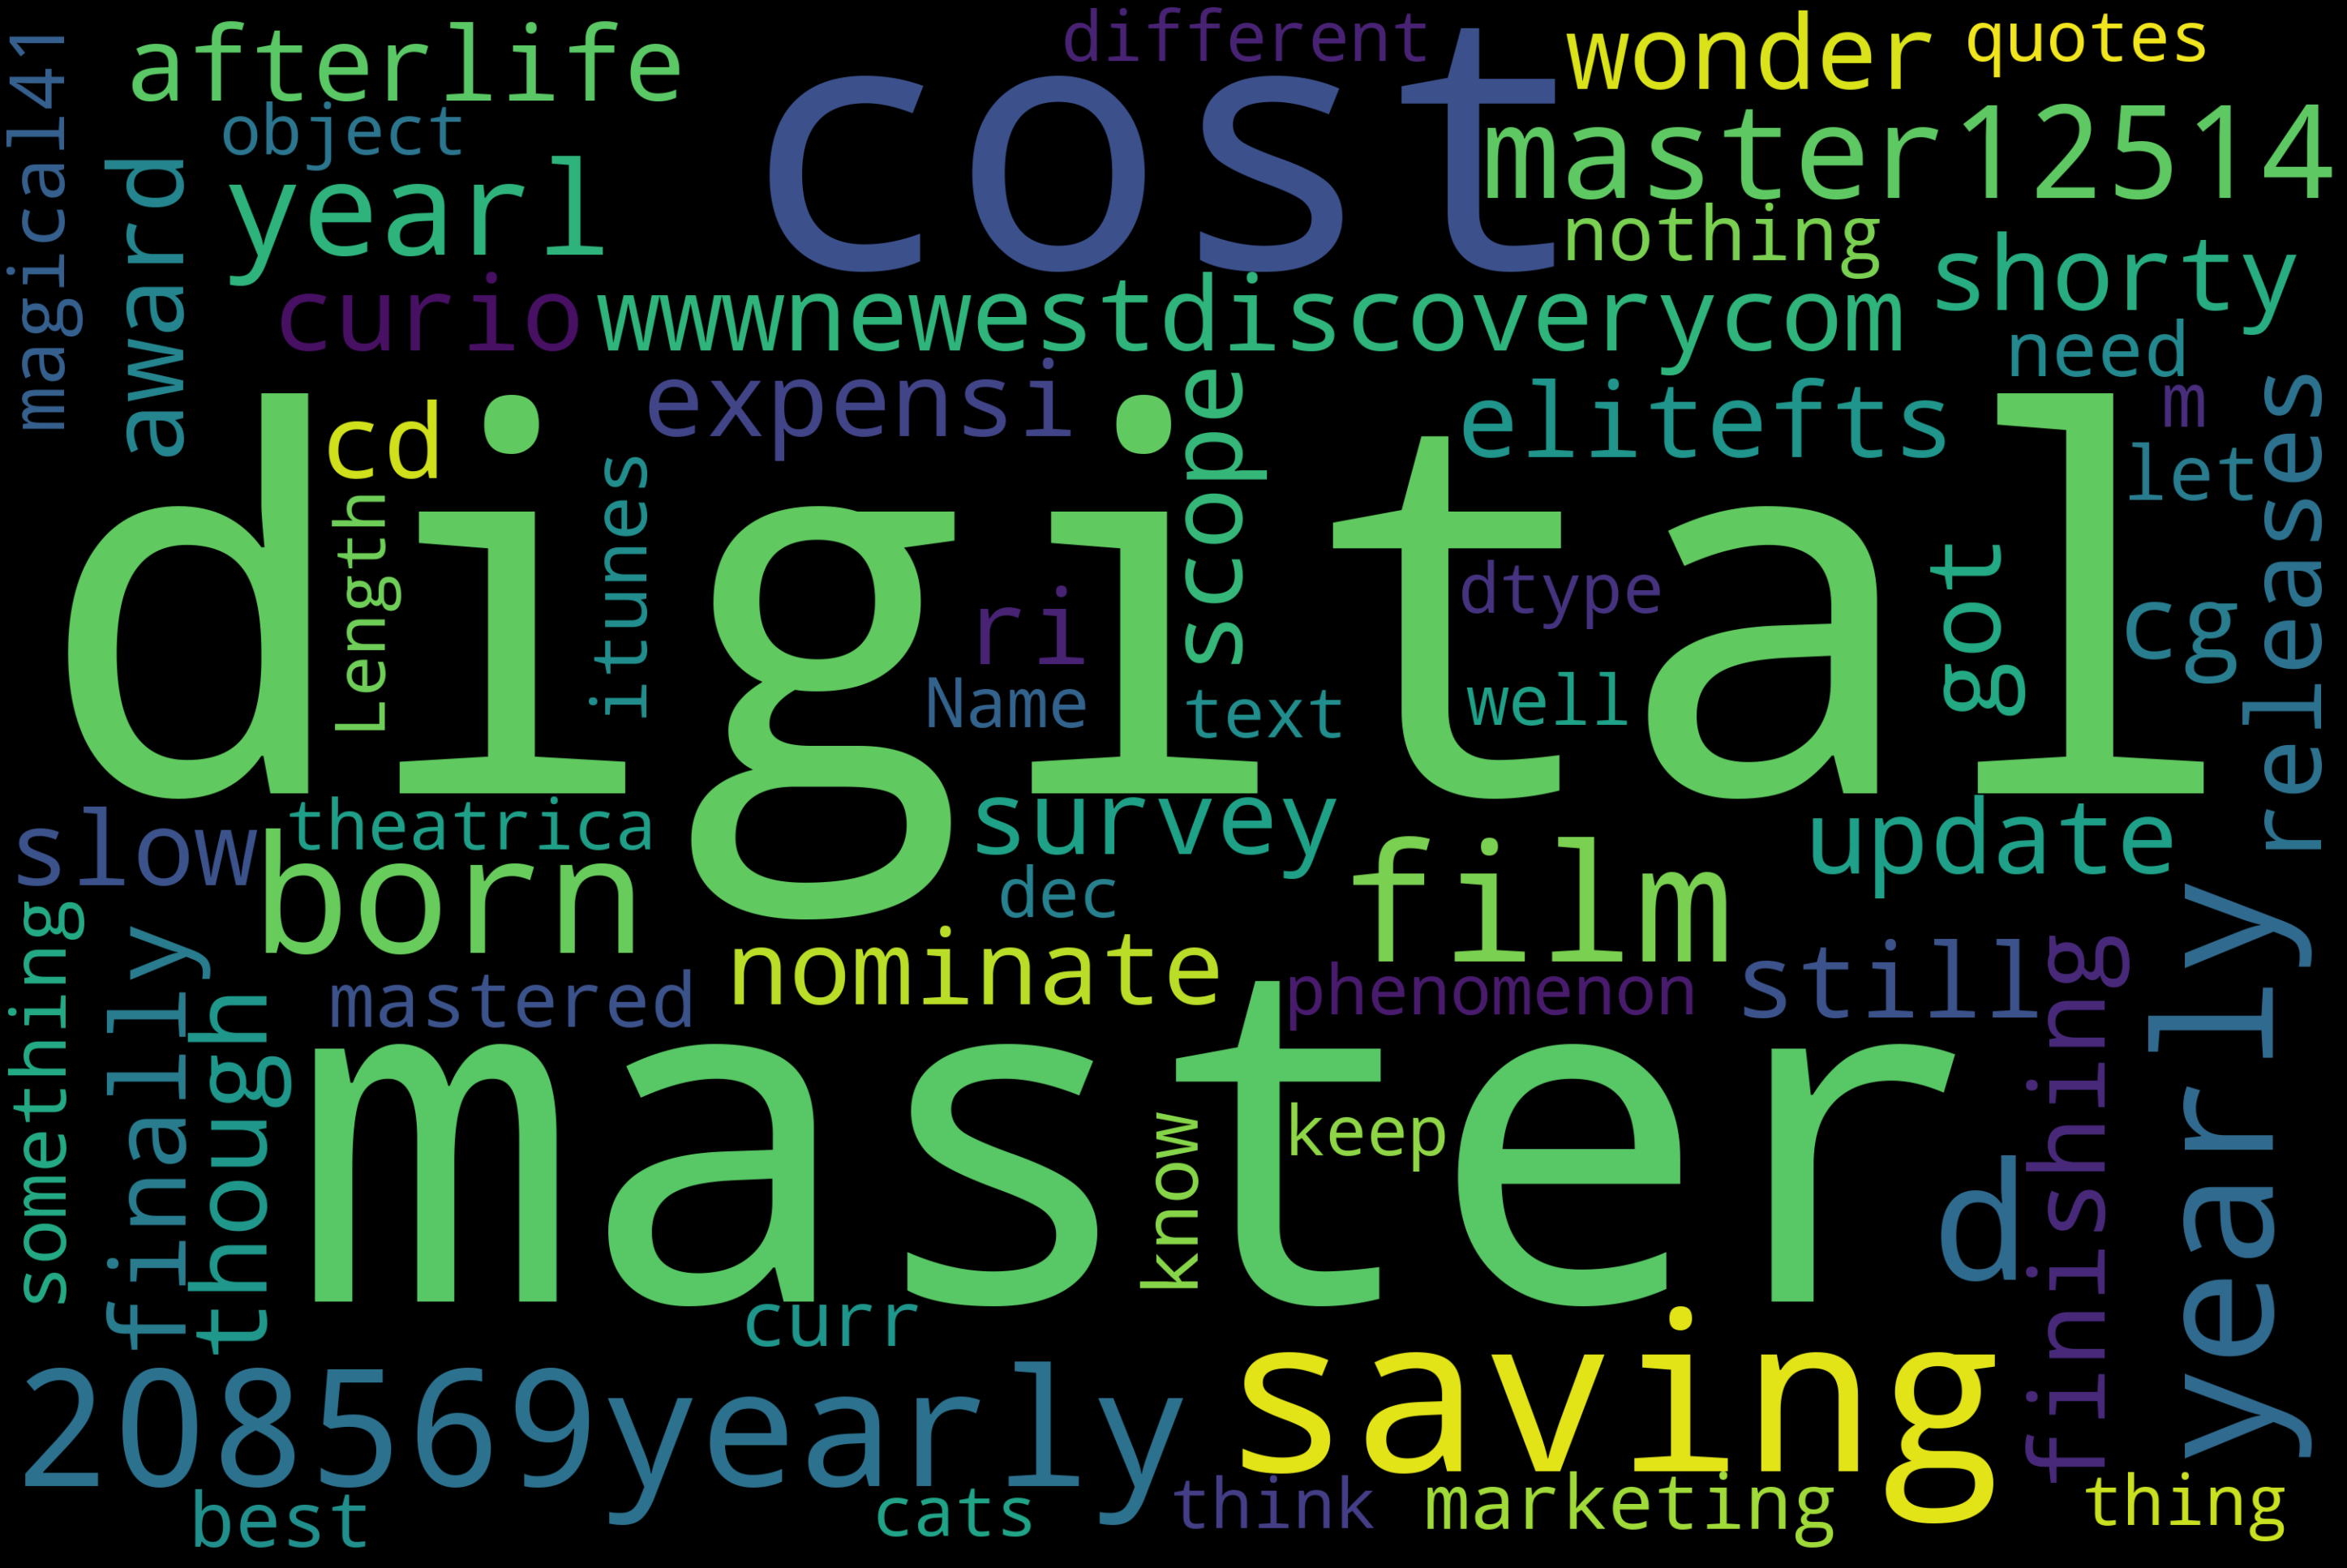

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_clean['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [43]:
documents = df_clean['text']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Azure is the leading IOT"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Data Analysis is a trend for amp"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 digital
 master
 masters
 transformation
 new
 apple
 photography
 book
 drive
 amp
Cluster 1:
 vigeant
 phil
 talk
 high
 quality
 tech
 creating
 great
 masters
 favorito
Cluster 2:
 threat
 net
 meets
 digidisasterthe
 save
 world
 masters
 digital
 digidisaster
 froma
Cluster 3:
 weddings
 graphic
 designs
 corporate
 cre
 production
 camera
 creative
 experts
 video


Prediction
[0]
[0]
